In [1]:
# Date Created: 20th April
# 'phase3.ipynb' features data cleansing, integration, and visualisation that aids to find correlation between prople's
# everyday life and incidence rates of chronic disease

In [2]:
# data cleansing

In [3]:
import pandas as pd
import numpy as np

In [4]:
# read in data
raw_chronic = pd.read_csv('LGA11_Chronic_Disease.csv', encoding = 'ISO-8859-1')

In [5]:
# first, clean modelled estimate data

In [6]:
# rename column headings for easier cleaning
lst = []
for i in raw_chronic.columns:
    i = i.lstrip()
    i = i.replace('_3_11_7_13', '')
    lst.append(i)
    
raw_chronic.columns = lst

In [7]:
# delete unincorporated data
raw_chronic = raw_chronic[raw_chronic['area_name'] != 'Unincorporated Vic']

In [8]:
del raw_chronic['area_name']

In [9]:
# delete columns that contain high error data
raw_chronic
for i in raw_chronic.columns:
    if 'rrmse' in i:
        count = 0
        for j in raw_chronic[i]:
            if j != 3:
                count+=1
            if count >= 3:
                del raw_chronic[i]
                rate = i.replace('3_rrmse','2_rate')
                del raw_chronic[rate]
                break
            
for i in raw_chronic.columns:
    if 'rrmse' in i:
        del raw_chronic[i]

In [10]:
# change column headings to human readable versions
chronic_df = raw_chronic.rename(columns={'area_code': 'LGA', 'mntl_bh_p_me_2_rate': 'Mental_and_Behavioural_Problems', 
                                         'hg_choles_me_2_rate': 'High_Cholesterol', 'asthma_me_2_rate': 'Asthma', 
                                         'respirtry_me_2_rate': 'Respiratory_System_Diseases', 'arthritis_me_2_rate': 'Arthritis', 
                                         'musculo_me_2_rate': 'Musculoskeletal_System_Diseases', 'hypertens_me_2_rate': 'Hypertension', 
                                         'circ_me_2_rate': 'Circulatory_System_Diseases'})
chronic_df = chronic_df[['LGA', 'Mental_and_Behavioural_Problems', 'High_Cholesterol', 'Asthma', 
                         'Respiratory_System_Diseases', 'Arthritis', 'Musculoskeletal_System_Diseases', 
                         'Hypertension', 'Circulatory_System_Diseases']]

In [11]:
chronic_df

,LGA,Mental_and_Behavioural_Problems,High_Cholesterol,Asthma,Respiratory_System_Diseases,Arthritis,Musculoskeletal_System_Diseases,Hypertension,Circulatory_System_Diseases
0,20110,13.430346,35.305739,12.847668,34.351126,14.589189,28.497306,9.578797,17.665612
1,20260,14.212027,34.937599,12.644486,30.684897,16.168366,29.849878,9.800078,17.495232
2,20570,14.741662,33.974781,15.146919,35.669154,16.196438,28.830259,9.828118,17.390503
3,20660,12.617463,32.767344,11.411211,33.128719,13.473802,26.211313,9.849293,16.082555
4,20740,14.691980,33.047040,13.611581,30.029335,15.714400,27.807524,9.675200,17.420306
5,20830,13.344689,36.449763,13.322196,29.716932,14.197354,27.134165,8.999074,16.031389
6,20910,12.118918,34.324752,10.174982,30.353539,12.696293,25.619950,9.688458,15.317441
7,21010,14.774803,35.486708,14.110733,31.295576,14.939552,28.919242,9.587442,17.258563
8,21110,12.112345,34.368258,9.456149,29.475693,12.077639,24.527095,9.452646,14.264909
9,21180,12.143663,31.734322,8.396183,24.481204,13.655008,25.379024,10.113309,16.617248


In [12]:
# clean survey data

raw_visit_green = pd.read_csv('LGA_Visit_to_green_space.csv', encoding = 'ISO-8859-1')
raw_sleep = pd.read_csv('LGA_Inadequate_sleep.csv', encoding = 'ISO-8859-1')
raw_soft_drink = pd.read_csv('LGA_Daily_soft_drink_consumption.csv', encoding = 'ISO-8859-1')
raw_sedentary = pd.read_csv('LGA_Sedentary_behaviour.csv', encoding = 'ISO-8859-1')
raw_time_pressure = pd.read_csv('LGA_Time_pressure.csv', encoding = 'ISO-8859-1')
raw_wl_balance = pd.read_csv('LGA_Adequate_work-life_balance.csv', encoding = 'ISO-8859-1')

In [13]:
def rename_survey(df, new_name):
    df.rename(columns = {' lga_code06': 'LGA', ' vic_ave': 'Average', 'numeric': new_name}, inplace = True)
    return None

In [14]:
rename_survey(raw_sedentary, 'Sedentary_behaviour')
rename_survey(raw_sleep, 'Inadequate_sleep')
rename_survey(raw_soft_drink, 'Soft_drink_comsumption')
rename_survey(raw_visit_green, 'Visit_to_green_space')
rename_survey(raw_time_pressure, 'Time_pressure')
rename_survey(raw_wl_balance, 'Work_life_balance')

In [15]:
# Crop outliers of the survey data
# Upper boundary of normal range is chosen as 3 IQR above the third quartile this range are outliers
# Suspected outliers are included in order to reasonably maximise sample size
# Lower boundary is selected by 3 IQR below the first quartile

def crop_outlier(df, col_name):
    q3 = df[col_name].quantile(.75)
    q1 = df[col_name].quantile(.25)
    IQR = q3 - q1
    outlier = q3 + 1.5 * IQR
    outlier0 = q1 - 1.5 * IQR
    average = df['Average'][0]
    index = -1
    lst = []
    for i in df[col_name]:
        index += 1
        if i > outlier or i < outlier0:
            lst.append(index)
        else:
            next
    for i in lst:
        df.set_value(i, col_name, average)
    
    del df['Average']
    return None

In [16]:
crop_outlier(raw_sedentary, 'Sedentary_behaviour')
crop_outlier(raw_sleep, 'Inadequate_sleep')
crop_outlier(raw_soft_drink, 'Soft_drink_comsumption')
crop_outlier(raw_visit_green, 'Visit_to_green_space')
crop_outlier(raw_time_pressure, 'Time_pressure')
crop_outlier(raw_wl_balance, 'Work_life_balance')

In [17]:
# merge survey data into one condensed dataframe, remove duplicated columns

survey_df = pd.concat([raw_visit_green, raw_time_pressure, raw_sedentary, raw_soft_drink, raw_wl_balance, raw_sleep], axis=1)
survey_df = survey_df.loc[:,~survey_df.columns.duplicated()]
survey_df = survey_df[['LGA', 'Visit_to_green_space', 'Time_pressure', 'Sedentary_behaviour',  'Soft_drink_comsumption', 
                     'Work_life_balance', 'Inadequate_sleep']]

In [18]:
survey_df

,LGA,Visit_to_green_space,Time_pressure,Sedentary_behaviour,Soft_drink_comsumption,Work_life_balance,Inadequate_sleep
0,25490,46.1,37.5,20.7,13.5,48.0,26.4
1,20110,46.3,28.4,20.3,9.9,44.6,26.4
2,20260,45.2,36.0,15.2,13.0,48.2,28.7
3,20570,49.2,39.7,28.7,13.9,50.7,28.8
4,20660,56.6,42.8,34.6,6.1,51.0,34.3
5,20740,59.4,36.1,21.3,15.4,48.3,27.9
6,20830,45.0,37.3,23.8,9.7,45.8,23.1
7,20910,50.7,46.2,39.8,6.9,59.0,24.8
8,21010,44.3,36.9,21.6,13.6,42.3,31.7
9,21110,65.4,39.9,45.9,4.3,63.8,23.3


In [19]:
# clean income data

raw_income = pd.read_csv('LGA_B17B_Personal_income.csv', encoding = 'ISO-8859-1')

In [20]:
# discard all gender-related data

lst = []
for i in raw_income.columns:
    i = i.lstrip()
    lst.append(i)

raw_income.columns = lst

for i in raw_income.columns:  
    if 'ns' in i:
        del raw_income[i]
    elif i[0] == 'F' or i[0] =='M':
        del raw_income[i]

raw_income = raw_income[raw_income['LGA_NAME11'] != 'Unincorporated Vic']
del raw_income['LGA_NAME11']

In [21]:
# discard all age related data

for i in raw_income.columns:
    if i == 'LGA_MAIN11':
        next
    elif i[-3:] != 'Tot':
        del raw_income[i]

raw_income.columns

Index(['P_1_199_Tot', 'P_Neg_Nil_income_Tot', 'P_600_799_Tot',
       'P_2000_more_Tot', 'P_200_299_Tot', 'P_Tot_Tot', 'P_1250_1499_Tot',
       'P_300_399_Tot', 'P_1000_1249_Tot', 'P_800_999_Tot', 'P_400_599_Tot',
       'P_1500_1999_Tot', 'LGA_MAIN11'],
      dtype='object')

In [22]:
# merge income data into defined intervals, normalise row number data into percentage data

income_neg = 100 * raw_income['P_Neg_Nil_income_Tot'] / raw_income['P_Tot_Tot']

income_1_299 = 100 * (raw_income['P_1_199_Tot'] + raw_income['P_200_299_Tot']) / raw_income['P_Tot_Tot']

income_300_599 = 100 * (raw_income['P_300_399_Tot'] + raw_income['P_400_599_Tot']) / raw_income['P_Tot_Tot']

income_600_999 = 100 * (raw_income['P_600_799_Tot'] + raw_income['P_800_999_Tot']) / raw_income['P_Tot_Tot']

income_1000_1499 = 100 * (raw_income['P_1000_1249_Tot'] + raw_income['P_1250_1499_Tot']) / raw_income['P_Tot_Tot']

income_1500_1999 = 100 * raw_income['P_1500_1999_Tot'] / raw_income['P_Tot_Tot']

income_2000_ = 100* raw_income['P_2000_more_Tot'] / raw_income['P_Tot_Tot']

income_df = pd.DataFrame({'LGA': raw_income['LGA_MAIN11'], '< 0': income_neg, '1 ~ 299': income_1_299, 
                          '300 ~ 599': income_300_599, '600 ~ 999': income_600_999, '1000 ~ 1499': income_1000_1499, 
                          '1500 ~ 1999': income_1500_1999, '> 2000': income_2000_})

income_df = income_df[['LGA', '< 0', '1 ~ 299',  '300 ~ 599',  '600 ~ 999', '1000 ~ 1499',  '1500 ~ 1999',  '> 2000']]

In [23]:
income_df

,LGA,< 0,1 ~ 299,300 ~ 599,600 ~ 999,1000 ~ 1499,1500 ~ 1999,> 2000
0,20110,5.266362,22.161339,30.268899,20.476915,10.035515,3.267377,2.232369
1,20260,5.571242,19.461338,28.779322,20.558210,9.795830,3.236316,1.922242
2,20570,6.295628,20.410683,25.518331,20.345642,12.138629,4.648385,3.249356
3,20660,8.217375,17.214320,20.591774,18.072054,15.134779,7.632182,6.951344
4,20740,5.572516,20.910164,29.079660,18.182928,9.960516,3.288965,4.123418
5,20830,7.265568,19.559574,25.646784,19.498323,12.019834,4.859268,3.645909
6,20910,8.984624,13.864391,16.969451,14.700264,13.276434,7.944185,16.588769
7,21010,6.167362,21.554708,29.532345,20.551957,10.710800,3.620552,2.023250
8,21110,10.641779,14.036343,15.344403,15.081116,14.083521,8.264595,16.205028
9,21180,10.680655,23.068863,20.673152,19.487464,10.982147,3.468509,2.050956


In [24]:
# Data cleasing is done

In [25]:
# Second, use LGA codes to join datasets together and examine autocorrelation of data

In [26]:
# join the three datasets together


chr_surv_df = chronic_df.join(survey_df.set_index('LGA'), on='LGA')
chr_inc_df = chronic_df.join(income_df.set_index('LGA'), on='LGA')
chr_surv_inc_df = chr_surv_df.join(income_df.set_index('LGA'), on='LGA')

del chronic_df['LGA']
del survey_df['LGA']
del income_df['LGA']

In [27]:
# these datasets are joined in the above way for future wrangling

In [28]:
del chr_surv_df['LGA']
del chr_inc_df['LGA']
del chr_surv_inc_df['LGA']

In [29]:
import matplotlib.pyplot as plt
import pylab
import numpy as np

from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot

%matplotlib inline

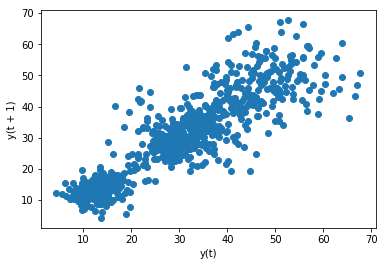

In [30]:
# Draw lag plot and aucorrelation plot to measure autocorrelation

lag_plot(chr_surv_df)


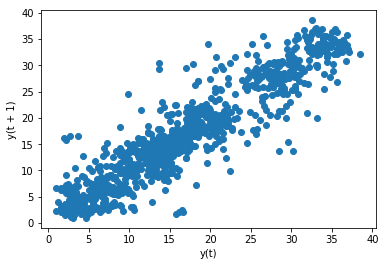

In [31]:
lag_plot(chr_inc_df)

In [32]:
# Autocorrelation step is done 
# The data is worth for further investigation

In [33]:
# Third, calculate Pearson correlation of each pair of attributes

In [34]:
def p_corr(df1, df2, size = 20):
    index = df2.columns
    columns = df1.columns
    corr_df = pd.DataFrame(index=index, columns=columns)
    corr = 0
    for i in df1:
        lst = []
        for j in df2:
            corr = df1[i].corr(df2[j])
            lst.append(corr)
        corr_df[i] = lst
    return corr_df

In [35]:
import numpy as np
import seaborn as sns

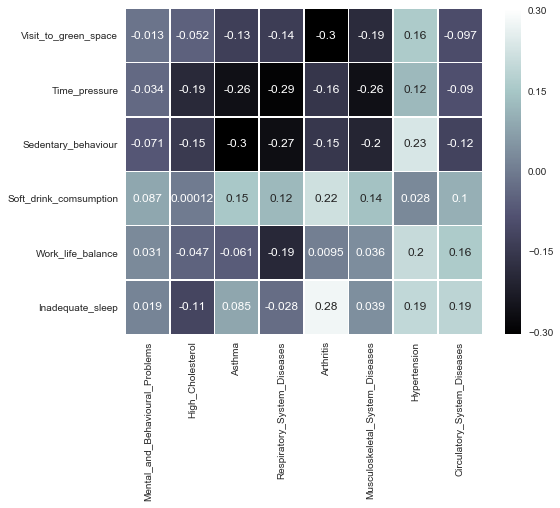

In [36]:
# Pearson correlation of pairs of variables from chronic disease data and survey data
fig, ax = plt.subplots(figsize=(8, 6))   
sns.heatmap(p_corr(chronic_df, survey_df), linewidths=.5, annot=True, cmap='bone', ax=ax)

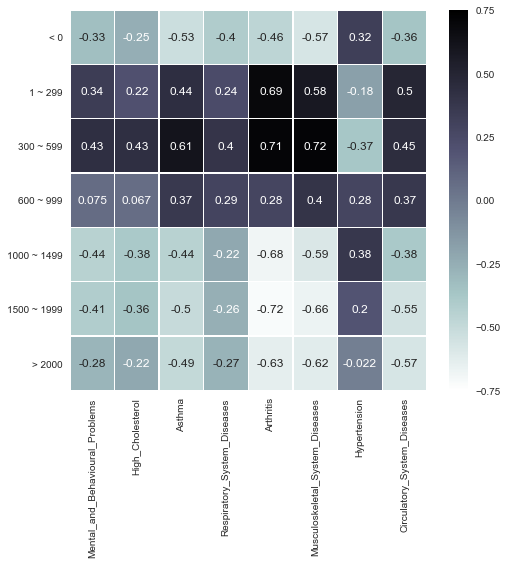

In [37]:
# Pearson correlation of pairs of variables from chronic disease data and income data
fig, ax = plt.subplots(figsize=(8, 7))   
sns.heatmap(p_corr(chronic_df, income_df), vmin = -0.75, vmax = 0.75, linewidths =.5, cmap='bone_r', annot=True)

In [38]:
# despite people with negative income, people with lower weekly income generally have greater chance of 
# getting chronic disease

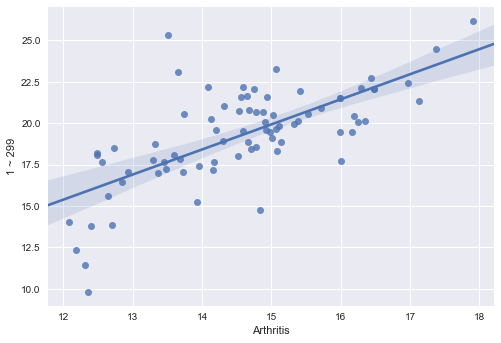

In [39]:
x = chronic_df['Arthritis']
y = income_df['1 ~ 299']
sns.regplot(x, y)

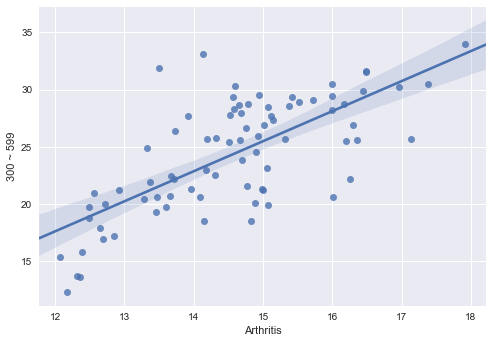

In [40]:
x = chronic_df['Arthritis']
y = income_df['300 ~ 599']
sns.regplot(x, y)

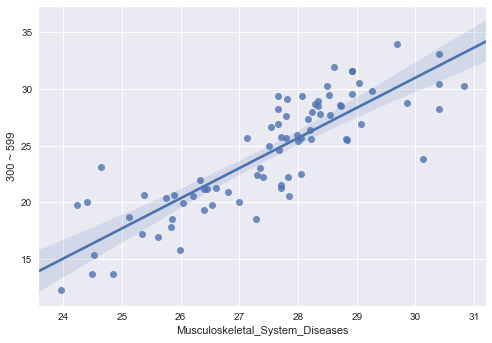

In [42]:
x = chronic_df['Musculoskeletal_System_Diseases']
y = income_df['300 ~ 599']
sns.regplot(x = 'Musculoskeletal_System_Diseases', y = '300 ~ 599', data = chr_inc_df)

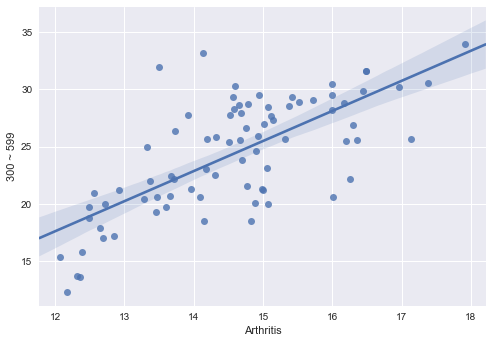

In [43]:
x = chronic_df['Arthritis']
y = income_df['300 ~ 599']
sns.regplot(x,y)

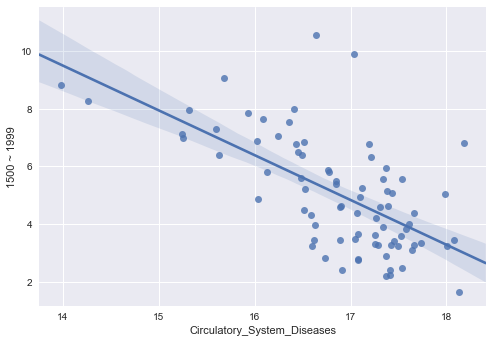

In [44]:
x = chronic_df['Circulatory_System_Diseases']
y = income_df['1500 ~ 1999']
sns.regplot(x = 'Circulatory_System_Diseases', y = '1500 ~ 1999', data = chr_inc_df)

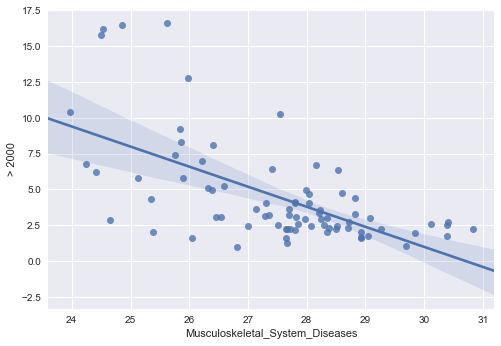

In [45]:
x = chronic_df['Musculoskeletal_System_Diseases']
y = income_df['> 2000']
sns.regplot(x, y)

In [47]:
# VAT algorithms for visualising clustering tendency
# from Workshop 6 of COMP20008 Elements of Computing

import numpy as np
import math,random
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I

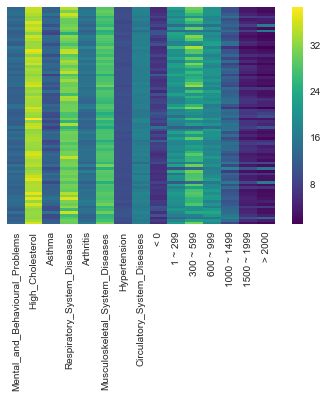

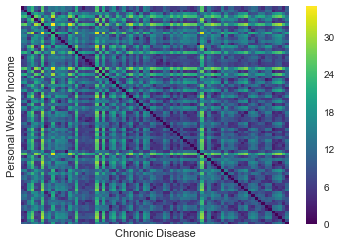

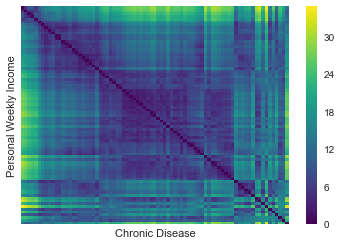

In [48]:
# visualise clustering tendency between income and chronic disease

#### Draw heatmap of raw matrix ####
sns.heatmap(chr_inc_df,cmap='viridis',xticklabels=True,yticklabels=False)
plt.show()


#### Visualise the dissimilarity matrix using a heatmap (without applying VAT) ####
chr_inc_df0=chr_inc_df.copy().as_matrix()
np.random.shuffle(chr_inc_df0)   ####randomise the order of rows (objects)
sq = squareform(pdist(chr_inc_df0))   ###commpute the dissimilarity matrix
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Chronic Disease', ylabel='Personal Weekly Income')
plt.show()


##### Apply VAT Algorithm to dataset and visualise using heatmap ####
RV, C, I = VAT(chr_inc_df)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Chronic Disease', ylabel='Personal Weekly Income')
plt.show()

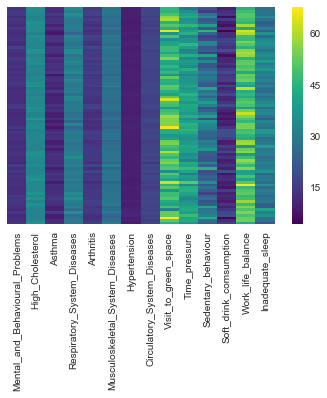

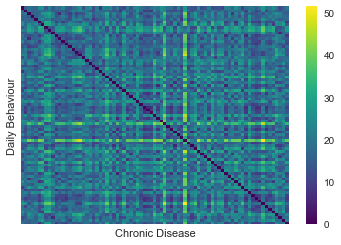

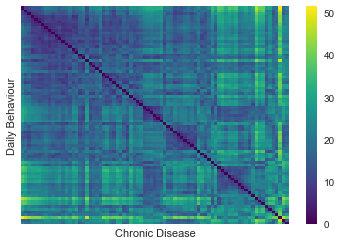

In [49]:
# visualise clustering tendency between daily behaviour and chronic disease

#### Draw heatmap of raw matrix ####
sns.heatmap(chr_surv_df,cmap='viridis',xticklabels=True,yticklabels=False)
plt.show()


#### Visualise the dissimilarity matrix using a heatmap (without applying VAT) ####
chr_surv_df0=chr_surv_df.copy().as_matrix()
np.random.shuffle(chr_surv_df0)   #### randomise the order of rows (objects)
sq = squareform(pdist(chr_surv_df0))   #### commpute the dissimilarity matrix
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Chronic Disease', ylabel='Daily Behaviour')
plt.show()


##### Apply VAT Algorithm to dataset and visualise using heatmap ####
RV, C, I = VAT(chr_surv_df)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Chronic Disease', ylabel='Daily Behaviour')
plt.show()

In [ ]:
# In conclusion, while choosing appropriate dataset is the key, the approaches used to 
# manipulate and wrangle the data are more important; different approach provides different 
# viewpoints and subsequently alters the outcome of visualisation and analysis.